# 5.1 ベルヌーイモデル

In [2]:
# パッケージの読み込み
using Distributions, PyPlot, LinearAlgebra

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 5.1.1 生成過程

In [4]:
function generate(N)
    μ = rand(Uniform(0, 1))
    X = rand(Bernoulli(μ), N)
    μ, X
end

# 5回コイン投を行う
generate(5)

(0.7105833666319178, Bool[0, 1, 1, 0, 1])

In [5]:
# 1を表、0を裏とする
side(x) = x == 1 ? "表" : "裏"

for i in 1:10
    μ, X = generate(5)
    println("コイン $(i), 表が出る確率 μ = $(μ), 出目X = $(side.(X))")
end

コイン 1, 表が出る確率 μ = 0.35341172013929034, 出目X = ["裏", "表", "裏", "表", "表"]
コイン 2, 表が出る確率 μ = 0.4293388136097327, 出目X = ["表", "表", "裏", "裏", "表"]
コイン 3, 表が出る確率 μ = 0.7576317862312106, 出目X = ["裏", "表", "表", "裏", "裏"]
コイン 4, 表が出る確率 μ = 0.6721143958206267, 出目X = ["裏", "表", "裏", "表", "表"]
コイン 5, 表が出る確率 μ = 0.8807729882949149, 出目X = ["表", "表", "表", "表", "表"]
コイン 6, 表が出る確率 μ = 0.2355523856586902, 出目X = ["裏", "裏", "裏", "表", "裏"]
コイン 7, 表が出る確率 μ = 0.5607145156838136, 出目X = ["表", "表", "表", "裏", "表"]
コイン 8, 表が出る確率 μ = 0.6315820160386735, 出目X = ["表", "表", "裏", "表", "表"]
コイン 9, 表が出る確率 μ = 0.4991450553883834, 出目X = ["裏", "裏", "裏", "表", "裏"]
コイン 10, 表が出る確率 μ = 0.9179890992624259, 出目X = ["表", "表", "表", "表", "表"]


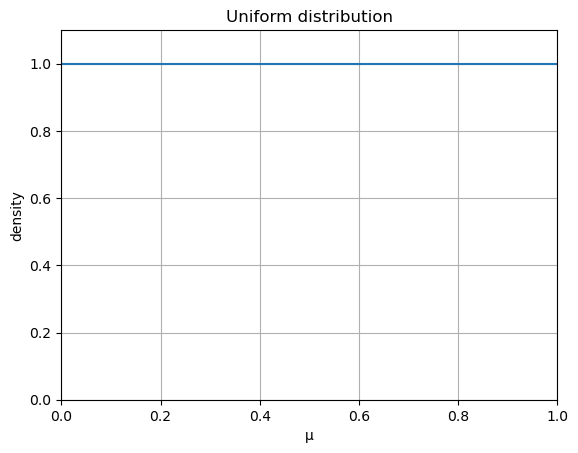

(0.0, 1.1)

In [6]:
μs = range(0, 1, length=100)
fig, ax = subplots()
ax.plot(μs, pdf.(Uniform(0, 1), μs))
set_options(ax, "μ", "density", "Uniform distribution")
ax.set_xlim([0,1])
ax.set_ylim([0,1.1])

## 5.1.2 伝承サンプリング

In [7]:
# ["裏", "裏", "裏", "表", "表"]をデータとして取得
X_obs1 = [0,0,0,1,1]

5-element Vector{Int64}:
 0
 0
 0
 1
 1

In [8]:
maxiter = 1_000_000
μ_posterior1 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate(length(X_obs1))
    
    # X内の1の合計が観測と一致していれば、このときのパラメータを受容
    sum(X) == sum(X_obs1) && push!(μ_posterior1, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior1) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior1'

acceptance rate = 0.166885


1×166885 adjoint(::Vector{Any}) with eltype Any:
 0.224416  0.404573  0.515917  0.81986  …  0.167739  0.387309  0.727237

### 事後分布(posterior distribution)

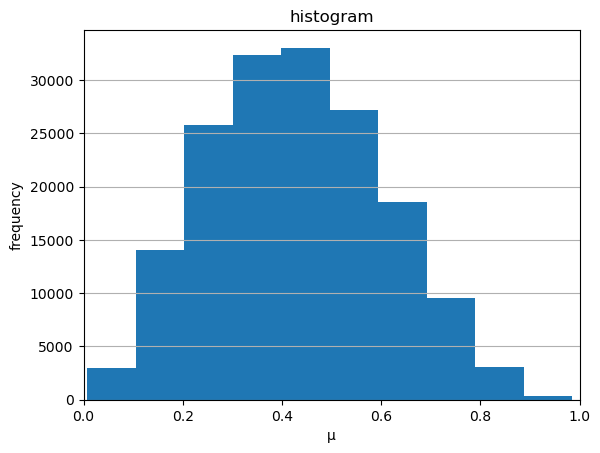

In [9]:
fig, ax = subplots()
ax.hist(μ_posterior1)
ax.set_xlim([0,1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

In [10]:
X_obs2 = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

20-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 1
 1
 1
 1
 1
 1
 1

In [11]:
maxiter = 1_000_000
μ_posterior2 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate(length(X_obs2))
    
    # X内の1の合計が観測と一致していれば、このときのパラメータを受容
    sum(X) == sum(X_obs2) && push!(μ_posterior2, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior2) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior2'

acceptance rate = 0.047541


1×47541 adjoint(::Vector{Any}) with eltype Any:
 0.579124  0.231898  0.401219  0.299731  …  0.338462  0.541862  0.275284

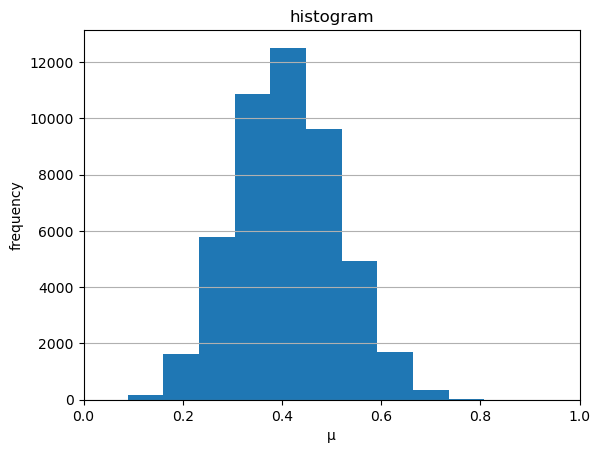

In [12]:
fig, ax = subplots()
ax.hist(μ_posterior2)
ax.set_xlim([0,1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

## 5.1.3 予測

In [13]:
pred1 = mean(rand.(Bernoulli.(μ_posterior1)))
pred2 = mean(rand.(Bernoulli.(μ_posterior2)))

println("$(pred1), $(pred2)")

0.42965515175120594, 0.41038261710944235


## 5.1.4 事前分布の変更

In [14]:
function generate2(N)
    # μの事前分布を修正
    μ = rand(Uniform(0, 0.5))
    X = rand(Bernoulli(μ), N)
    μ, X
end

# 5回コイン投を行う
generate2(5)

(0.04610387047868786, Bool[0, 0, 0, 0, 0])

In [15]:
for i in 1:10
    μ, X = generate2(5)
    println("コイン $(i), 表が出る確率 μ = $(μ), 出目X = $(side.(X))")
end

コイン 1, 表が出る確率 μ = 0.14259465307501962, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 2, 表が出る確率 μ = 0.35624027871027264, 出目X = ["裏", "表", "裏", "裏", "裏"]
コイン 3, 表が出る確率 μ = 0.49439701830648675, 出目X = ["裏", "表", "表", "表", "裏"]
コイン 4, 表が出る確率 μ = 0.04012746281501073, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 5, 表が出る確率 μ = 0.09583081821451217, 出目X = ["裏", "裏", "裏", "表", "裏"]
コイン 6, 表が出る確率 μ = 0.30806293981533545, 出目X = ["裏", "裏", "裏", "表", "裏"]
コイン 7, 表が出る確率 μ = 0.09331794067768501, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 8, 表が出る確率 μ = 0.2954296800748491, 出目X = ["裏", "裏", "表", "裏", "裏"]
コイン 9, 表が出る確率 μ = 0.10735747633599374, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 10, 表が出る確率 μ = 0.11309517223111387, 出目X = ["裏", "表", "裏", "裏", "裏"]


In [16]:
maxiter = 1_000_000
μ_posterior3 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate2(length(X_obs1))
    
    # X内の1の合計が観測と一致していれば、このときのパラメータを受容
    sum(X) == sum(X_obs1) && push!(μ_posterior3, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior3) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior3'

acceptance rate = 0.218814


1×218814 adjoint(::Vector{Any}) with eltype Any:
 0.375007  0.322948  0.453564  0.450608  …  0.340413  0.18062  0.31536

### 事後分布(posterior distribution)

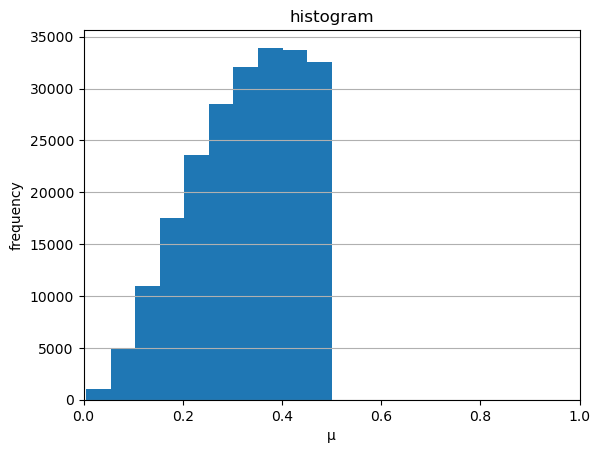

In [17]:
fig, ax = subplots()
ax.hist(μ_posterior3)
ax.set_xlim([0,1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

## 5.1.5 数値積分による推論計算

In [19]:
# 同時分布p(X, μ)の確率密度関数の定義
p_joint(X, μ) = prod(pdf.(Bernoulli(μ), X)) * pdf(Uniform(0, 1), μ)

# 数値積分
function approx_integration(μ_range, p)
    Δ = μ_range[2] - μ_range[1]
    X -> sum([p(X, μ) * Δ for μ in μ_range]), Δ
end

# μの積分範囲
μ_range = range(0, 1, length=100)

# 数値積分の実行
p_marginal, Δ = approx_integration(μ_range, p_joint)

# データ（2種類）
X_obs1 = [0,0,0,1,1]
X_obs2 = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

# それぞれの周辺尤度の近似計算
println("$(p_marginal(X_obs1)), $(p_marginal(X_obs2))")

0.016666666493163278, 3.7801895387034807e-7


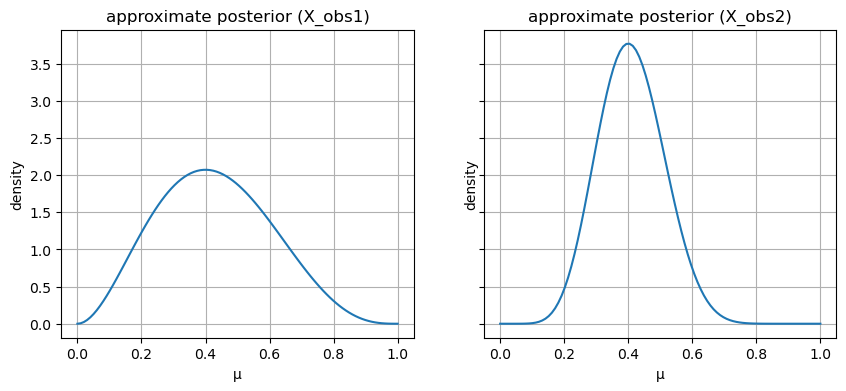

In [21]:
# パラメータの可視化の範囲
μs = range(0, 1, length=100)

fig, axes = subplots(1, 2, sharey=true, figsize=(10,4))
for (i, X_obs) in enumerate([X_obs1, X_obs2])
    posterior(μ) = p_joint(X_obs, μ)/p_marginal(X_obs)
    axes[i].plot(μs, posterior.(μs))
    set_options(axes[i], "μ", "density", "approximate posterior (X_obs$(i))")
end

In [22]:
# 積分の中身の式
posterior1(μ) = p_joint(X_obs1, μ)/p_marginal(X_obs1)
posterior2(μ) = p_joint(X_obs2, μ)/p_marginal(X_obs2)
p_inner1(x, μ) = pdf.(Bernoulli(μ), x) * posterior1(μ)
p_inner2(x, μ) = pdf.(Bernoulli(μ), x) * posterior2(μ)

#　パラメータμに関する積分
μ_range = range(0, 1, length=100)
pred1, Δ1 = approx_integration(μ_range, p_inner1)
pred2, Δ1 = approx_integration(μ_range, p_inner2)

println("$(pred1(1)), $(pred2(1))")

0.4285714434416307, 0.40909090909090784


## 5.1.6 厳密解法

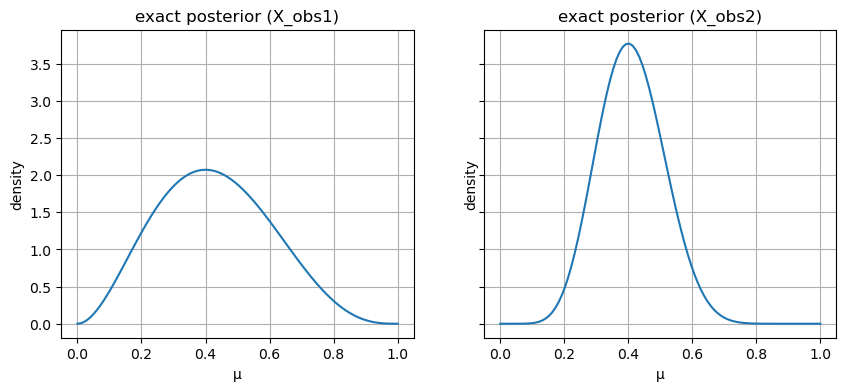

In [23]:
fig, axes = subplots(1, 2, sharey=true, figsize=(10, 4))
μs = range(0, 1, length=100)
for (i, X_obs) in enumerate([X_obs1, X_obs2])
    # 厳密な事後分布はベータ分布
    α = 1.0 + sum(X_obs)
    β = 1.0 + length(X_obs) - sum(X_obs)
    d = Beta(α, β)
    
    # 事後分布を可視化
    axes[i].plot(μs, pdf.(d, μs))
    set_options(axes[i], "μ", "density", "exact posterior (X_obs$(i))")
end

In [24]:
function prediction(X_obs)
    α = 1.0 + sum(X_obs)
    β = 1.0 + length(X_obs) - sum(X_obs)
    α/(α + β)
end

println("$(prediction(X_obs1)), $(prediction(X_obs2))")

0.42857142857142855, 0.4090909090909091
